In [73]:
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense, Activation, Dropout

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [74]:
X = np.load("../data/Train/X.npy")
Y = np.load("../data/Y.npy")

In [75]:
X_train = X[:21000]
Y_train = Y[:21000]

X_test = X[21000:]
Y_test = Y[21000:]

In [79]:
# pre-processing: divide by max and substract mean
scale = np.max(X)
X_train /= scale
X_test /= scale

mean = np.std(X)
X_train -= mean
X_test -= mean

input_dim = X.shape[1]
nb_classes = Y.shape[1]

In [85]:
# Here's a Deep Dumb MLP (DDMLP)
model = Sequential()
model.add(Dense(512, input_dim=input_dim))
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(Dense(nb_classes))
model.add(Activation('sigmoid'))

In [86]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])


In [87]:
print("Training...")
model.fit(X_train, Y_train, epochs=10, batch_size=64, validation_split=0.1, verbose=2)

Training...
Train on 18900 samples, validate on 2100 samples
Epoch 1/10
 - 8s - loss: 0.0857 - acc: 0.9793 - val_loss: 0.0721 - val_acc: 0.9820
Epoch 2/10
 - 7s - loss: 0.0715 - acc: 0.9817 - val_loss: 0.0702 - val_acc: 0.9820
Epoch 3/10
 - 7s - loss: 0.0698 - acc: 0.9818 - val_loss: 0.0675 - val_acc: 0.9820
Epoch 4/10
 - 7s - loss: 0.0689 - acc: 0.9818 - val_loss: 0.0668 - val_acc: 0.9821
Epoch 5/10
 - 7s - loss: 0.0681 - acc: 0.9818 - val_loss: 0.0694 - val_acc: 0.9822
Epoch 6/10
 - 7s - loss: 0.0672 - acc: 0.9819 - val_loss: 0.0653 - val_acc: 0.9821
Epoch 7/10
 - 7s - loss: 0.0664 - acc: 0.9819 - val_loss: 0.0660 - val_acc: 0.9822
Epoch 8/10
 - 7s - loss: 0.0661 - acc: 0.9819 - val_loss: 0.0638 - val_acc: 0.9823
Epoch 9/10
 - 7s - loss: 0.0660 - acc: 0.9819 - val_loss: 0.0655 - val_acc: 0.9821
Epoch 10/10
 - 7s - loss: 0.0659 - acc: 0.9819 - val_loss: 0.0636 - val_acc: 0.9823


In [88]:
print("Generating test predictions...")
preds = model.predict(X_test, verbose=0)

Generating test predictions...


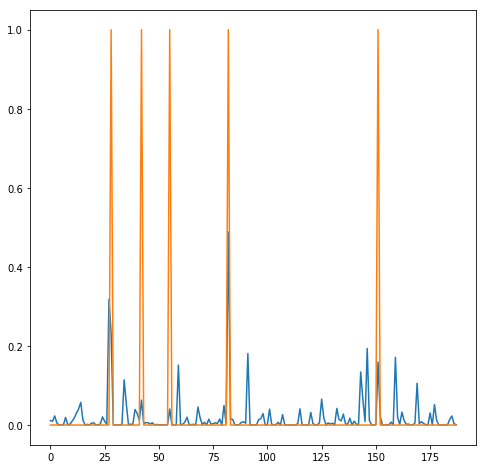

In [89]:
plt.figure(figsize=(8,8))
plt.plot(preds[5])
plt.plot(Y_test[5])